# This analysis will mostly focus on the amount of three-pointers attempted vs. the amount of three pointers made and also the amount of three pointers vs. total shots.

# Before any analysis can be done, we must first import everything we need.

In [1]:
# Imports

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configure libraries
# The seaborn library makes plots look nicer
sns.set()
sns.set_context('talk')

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Here we can take a look at the type of data we are working with.

In [2]:
df_test = pd.read_csv("00-01_team_stats.csv")
df_test

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Sacramento Kings*,82,20080,3132,6969,0.45,479,1353,0.35,...,0.77,987,2705,3692,1852,793,432,1221,1596,8343
1,2.0,Milwaukee Bucks*,82,19780,3112,6798,0.46,562,1481,0.38,...,0.79,975,2500,3475,1844,672,386,1123,1928,8260
2,3.0,Los Angeles Lakers*,82,19905,3109,6685,0.47,439,1275,0.34,...,0.68,1085,2583,3668,1888,564,490,1184,1872,8251
3,4.0,Dallas Mavericks*,82,19805,3085,6716,0.46,517,1357,0.38,...,0.79,831,2571,3402,1740,618,492,1141,1907,8239
4,5.0,Toronto Raptors*,82,19955,3048,6972,0.44,429,1164,0.37,...,0.75,1118,2529,3647,2004,599,519,1080,1745,8007
5,6.0,Orlando Magic*,82,19955,3013,6873,0.44,490,1346,0.36,...,0.71,1069,2450,3519,1803,674,481,1245,2071,7992
6,7.0,Minnesota Timberwolves*,82,19830,3148,6871,0.46,322,901,0.36,...,0.79,1002,2470,3472,2083,682,456,1136,1900,7982
7,8.0,Seattle SuperSonics,82,19805,3029,6649,0.46,466,1169,0.40,...,0.73,999,2422,3421,1792,657,409,1252,1733,7978
8,9.0,Houston Rockets,82,19830,2943,6494,0.45,504,1412,0.36,...,0.76,919,2524,3443,1613,587,358,1204,1657,7972
9,10.0,Utah Jazz*,82,19780,2960,6289,0.47,325,852,0.38,...,0.75,943,2383,3326,2110,661,463,1296,2107,7959


# That is quite alot of data. For the purposes of looking at the league generally, we will only need the league averages from each DataFrame. Here, we will extract the information necessary.

In [3]:
#Load in all the dataframes for the years 2000-2019
#Use the tail function in order to only grab the league average (the only row we are concerned with)
df_0 = pd.read_csv("00-01_team_stats.csv").tail(1);
df_1 = pd.read_csv("01-02_team_stats.csv").tail(1);
df_2 = pd.read_csv("02-03_team_stats.csv").tail(1);
df_3 = pd.read_csv("03-04_team_stats.csv").tail(1);
df_4 = pd.read_csv("04-05_team_stats.csv").tail(1);
df_5 = pd.read_csv("05-06_team_stats.csv").tail(1);
df_6 = pd.read_csv("06-07_team_stats.csv").tail(1);
df_7 = pd.read_csv("07-08_team_stats.csv").tail(1);
df_8 = pd.read_csv("08-09_team_stats.csv").tail(1);
df_9 = pd.read_csv("09-10_team_stats.csv").tail(1);
df_10 = pd.read_csv("10-11_team_stats.csv").tail(1);
df_11 = pd.read_csv("11-12_team_stats.csv").tail(1);
df_12 = pd.read_csv("12-13_team_stats.csv").tail(1);
df_13 = pd.read_csv("13-14_team_stats.csv").tail(1);
df_14 = pd.read_csv("14-15_team_stats.csv").tail(1);
df_15 = pd.read_csv("15-16_team_stats.csv").tail(1);
df_16 = pd.read_csv("16-17_team_stats.csv").tail(1);
df_17 = pd.read_csv("17-18_team_stats.csv").tail(1);
df_18 = pd.read_csv("18-19_team_stats.csv").tail(1);

#Preview a dataframe to see what data is contained inside
df_0

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
29,NaN,League Average,82,19846,2926,6609,0.44,397,1124,0.35,...,0.75,983,2499,3482,1786,641,431,1234,1833,7774\


# So far, everything looks good! Rather than having the DataFrame's contain all the data, we now have isolated each DataFrame to only contain the information related to our analysis: League Average.

# The next step would be to get all of these into one cohesive DataFrame, thus allowing us to do analysis and create visualizations much easier with the tools we have. We will achieve this by creating a list of all the DataFrame names, and then concatenate them. One thing to also note is that in the above preview printout, it still has it's original index (29 since it was at the tail of a larger DataFrame). We can resolve this by setting the ignore_index flag to True.

In [4]:
#Concatenate all the dataframes together to make one cohesive dataframe
list_of_names = [df_0, df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18]
league_averages = pd.concat(list_of_names,ignore_index=True)

#Print it out to make sure everything looks good
league_averages

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,NaN,League Average,82,19846,2926,6609,0.44,397,1124,0.35,...,0.75,983,2499,3482,1786,641,431,1234,1833,7774\
1,NaN,League Average,82,19816,2966,6664,0.45,428,1209,0.35,...,0.75,1003,2474,3477,1798,639,428,1186,1741,7829
2,NaN,League Average,82,19842,2929,6624,0.44,421,1204,0.35,...,0.76,988,2481,3469,1763,651,411,1223,1784,7797
3,NaN,League Average,82,19820,2871,6545,0.44,425,1224,0.35,...,0.75,991,2469,3461,1747,650,415,1228,1759,7659
4,NaN,League Average,82,19833,2948,6588,0.45,459,1292,0.36,...,0.76,985,2448,3432,1745,616,399,1189,1856,7970
5,NaN,League Average,82,19852,2939,6477,0.45,470,1310,0.36,...,0.74,916,2442,3358,1690,588,385,1182,1866,7955
6,NaN,League Average,82,19858,2995,6536,0.46,498,1389,0.36,...,0.75,912,2454,3366,1746,594,378,1241,1822,8097
7,NaN,League Average,82,19803,3056,6683,0.46,537,1485,0.36,...,0.76,918,2524,3442,1784,597,388,1157,1724,8194
8,NaN,League Average,82,19822,3044,6635,0.46,545,1486,0.37,...,0.77,905,2481,3386,1720,596,394,1151,1726,8196
9,NaN,League Average,82,19817,3091,6700,0.46,527,1487,0.35,...,0.76,899,2523,3421,1742,592,398,1166,1710,8237


# Everything looks good so far. However, by doing all this data cleaning, we have lost some information: what year pertains to what data. Here we will add in a new column to represent this information.

In [5]:
# Insert a row that will let us know what year the league average is for.
league_years = ["00-01", "01-02", "02-03", "03-04", "04-05", "05-06", "06-07", "07-08", "08-09", "09-10", "10-11", "11-12", "12-13", "13-14", "14-15", "15-16", "16-17", "17-18", "18-19"]
league_averages.insert(loc=0, column="Year", value=league_years)

#Print it out to see the difference
league_averages

,Year,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,00-01,NaN,League Average,82,19846,2926,6609,0.44,397,1124,...,0.75,983,2499,3482,1786,641,431,1234,1833,7774\
1,01-02,NaN,League Average,82,19816,2966,6664,0.45,428,1209,...,0.75,1003,2474,3477,1798,639,428,1186,1741,7829
2,02-03,NaN,League Average,82,19842,2929,6624,0.44,421,1204,...,0.76,988,2481,3469,1763,651,411,1223,1784,7797
3,03-04,NaN,League Average,82,19820,2871,6545,0.44,425,1224,...,0.75,991,2469,3461,1747,650,415,1228,1759,7659
4,04-05,NaN,League Average,82,19833,2948,6588,0.45,459,1292,...,0.76,985,2448,3432,1745,616,399,1189,1856,7970
5,05-06,NaN,League Average,82,19852,2939,6477,0.45,470,1310,...,0.74,916,2442,3358,1690,588,385,1182,1866,7955
6,06-07,NaN,League Average,82,19858,2995,6536,0.46,498,1389,...,0.75,912,2454,3366,1746,594,378,1241,1822,8097
7,07-08,NaN,League Average,82,19803,3056,6683,0.46,537,1485,...,0.76,918,2524,3442,1784,597,388,1157,1724,8194
8,08-09,NaN,League Average,82,19822,3044,6635,0.46,545,1486,...,0.77,905,2481,3386,1720,596,394,1151,1726,8196
9,09-10,NaN,League Average,82,19817,3091,6700,0.46,527,1487,...,0.76,899,2523,3421,1742,592,398,1166,1710,8237


# Once again, there is quite abit of data. We will narrow this down to columns we need for our analysis.

In [6]:
#Keep just the relevant rows by making a subselection.
league_averages = league_averages[["Year", "FG", "FGA", "FG%", "3P", "3PA", "3P%"]]

#Print out to check what the DataFrame now looks like
league_averages

,Year,FG,FGA,FG%,3P,3PA,3P%
0,00-01,2926,6609,0.44,397,1124,0.35
1,01-02,2966,6664,0.45,428,1209,0.35
2,02-03,2929,6624,0.44,421,1204,0.35
3,03-04,2871,6545,0.44,425,1224,0.35
4,04-05,2948,6588,0.45,459,1292,0.36
5,05-06,2939,6477,0.45,470,1310,0.36
6,06-07,2995,6536,0.46,498,1389,0.36
7,07-08,3056,6683,0.46,537,1485,0.36
8,08-09,3044,6635,0.46,545,1486,0.37
9,09-10,3091,6700,0.46,527,1487,0.35


# An important distinction to note - 

FG: Shots made overall

FGA: Shots attempted overall

FG%: Percentage of shots made overall vs. shots attempted


3P: Three pointer shots made

3PA: Three pointers attempted

3P%: Percetange of three pointer shots vs. three pointers attempted.


That means 3P% represents the percentage of three pointers from three pointers attempted, NOT the percentage of three pointers vs. all shots attempted.

# With that clarified, we can now start with some visualizations. Here is the percentage of three-pointers made vs. all three-pointers attempted.

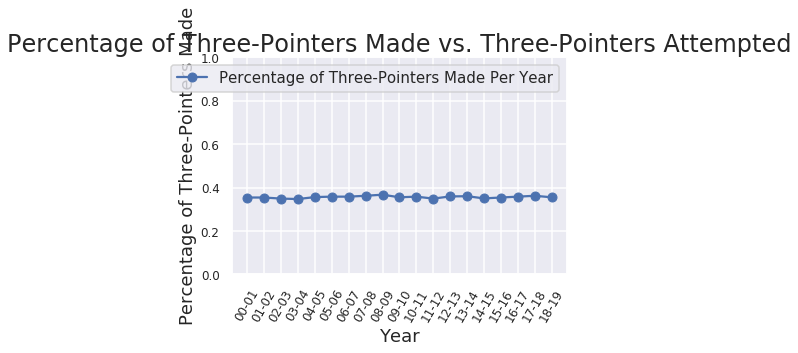

In [7]:
#gca = get current axis
ax = plt.gca()
ax.set_ylim([0,1])

#Change size of plot labels
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

#Set the axis labels
plt.xlabel('Years', fontsize=18)
plt.ylabel('Percentage of Three-Pointers Made', fontsize=18)

#Plot using MatPlotLib
league_averages.plot(kind='line',x='Year',y='3P%',ax=ax,marker = "o")

#Set the title, legend
plt.title('Percentage of Three-Pointers Made vs. Three-Pointers Attempted', fontsize=24)
plt.legend(['Percentage of Three-Pointers Made Per Year'], loc='upper right', fontsize=15)

#Set range for ticks
plt.xticks(np.arange(0,19), league_averages["Year"])
plt.xticks(rotation=60)

plt.show()

# Here, we can see that the amount of three point shots made vs. the amount of three points shots attempted stays extremely consistent. This can be even more supported by taking a look at just that column.

In [8]:
league_averages

,Year,FG,FGA,FG%,3P,3PA,3P%
0,00-01,2926,6609,0.44,397,1124,0.35
1,01-02,2966,6664,0.45,428,1209,0.35
2,02-03,2929,6624,0.44,421,1204,0.35
3,03-04,2871,6545,0.44,425,1224,0.35
4,04-05,2948,6588,0.45,459,1292,0.36
5,05-06,2939,6477,0.45,470,1310,0.36
6,06-07,2995,6536,0.46,498,1389,0.36
7,07-08,3056,6683,0.46,537,1485,0.36
8,08-09,3044,6635,0.46,545,1486,0.37
9,09-10,3091,6700,0.46,527,1487,0.35


# So, let's try to approach this from a different angle. Let's see, for example, the percentage of three point shots made vs. the total number of shots made.

In [9]:
league_averages['3P%/Total FG'] = league_averages["3P"] / league_averages["FG"]
league_averages

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Year,FG,FGA,FG%,3P,3PA,3P%,3P%/Total FG
0,00-01,2926,6609,0.44,397,1124,0.35,0.14
1,01-02,2966,6664,0.45,428,1209,0.35,0.14
2,02-03,2929,6624,0.44,421,1204,0.35,0.14
3,03-04,2871,6545,0.44,425,1224,0.35,0.15
4,04-05,2948,6588,0.45,459,1292,0.36,0.16
5,05-06,2939,6477,0.45,470,1310,0.36,0.16
6,06-07,2995,6536,0.46,498,1389,0.36,0.17
7,07-08,3056,6683,0.46,537,1485,0.36,0.18
8,08-09,3044,6635,0.46,545,1486,0.37,0.18
9,09-10,3091,6700,0.46,527,1487,0.35,0.17


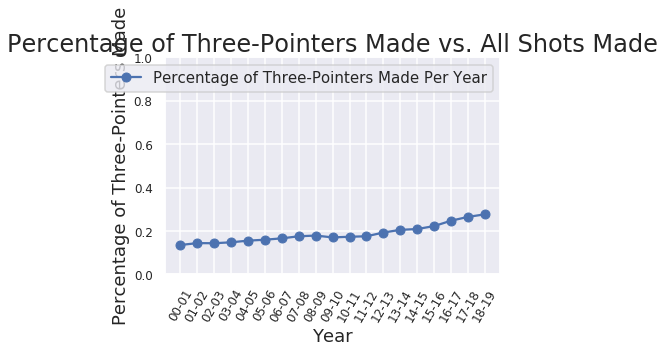

In [10]:
#gca = get current axis
ax = plt.gca()
ax.set_ylim([0,1])

#Change size of plot labels
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

#Set the axis labels
plt.xlabel('Years', fontsize=18)
plt.ylabel('Percentage of Three-Pointers Made', fontsize=18)

#Plot using MatPlotLib
league_averages.plot(kind='line',x='Year',y='3P%/Total FG',ax=ax,marker = "o")

#Set the title, legend
plt.title('Percentage of Three-Pointers Made vs. All Shots Made', fontsize=24)
plt.legend(['Percentage of Three-Pointers Made Per Year'], loc='upper right', fontsize=15)


#Set range for ticks
plt.xticks(np.arange(0,19), league_averages["Year"])
plt.xticks(rotation=60)

plt.show()

# Here, we can observe a slight increase in three pointers made per year in comparison to all shots made. However, since we previously saw that the percentage of shots made are pretty consistent (0.35-0.36 for all), we should also take a look at total amount of three-pointers attempted vs. shots-attempted.

In [11]:
league_averages['3PA/Total FGA'] = league_averages["3PA"] / league_averages["FGA"]
league_averages

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Year,FG,FGA,FG%,3P,3PA,3P%,3P%/Total FG,3PA/Total FGA
0,00-01,2926,6609,0.44,397,1124,0.35,0.14,0.17
1,01-02,2966,6664,0.45,428,1209,0.35,0.14,0.18
2,02-03,2929,6624,0.44,421,1204,0.35,0.14,0.18
3,03-04,2871,6545,0.44,425,1224,0.35,0.15,0.19
4,04-05,2948,6588,0.45,459,1292,0.36,0.16,0.20
5,05-06,2939,6477,0.45,470,1310,0.36,0.16,0.20
6,06-07,2995,6536,0.46,498,1389,0.36,0.17,0.21
7,07-08,3056,6683,0.46,537,1485,0.36,0.18,0.22
8,08-09,3044,6635,0.46,545,1486,0.37,0.18,0.22
9,09-10,3091,6700,0.46,527,1487,0.35,0.17,0.22


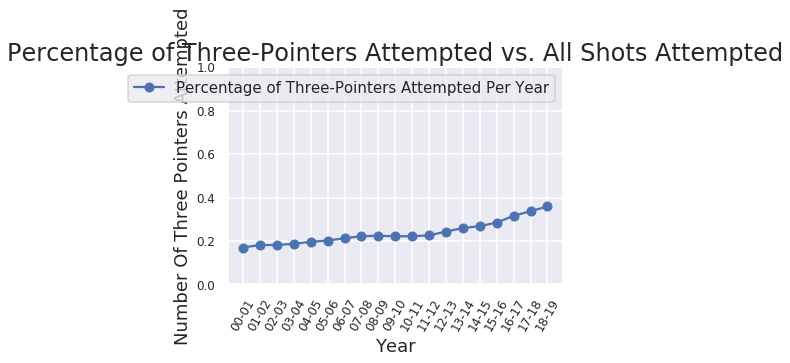

In [12]:
#gca = get current axis
ax = plt.gca()
ax.set_ylim([0,1])

#Change size of plot labels
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

#Set the axis labels
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number Of Three Pointers Attempted', fontsize=18)

#Plot using MatPlotLib
league_averages.plot(kind='line',x='Year',y='3PA/Total FGA',ax=ax,marker = "o")

#Set the title, legend
plt.title('Percentage of Three-Pointers Attempted vs. All Shots Attempted', fontsize=24)
plt.legend(['Percentage of Three-Pointers Attempted Per Year'], loc='upper right', fontsize=15)


#Set range for ticks
plt.xticks(np.arange(0,19), league_averages["Year"])
plt.xticks(rotation=60)

plt.show()

# Here we can see quite a large increase in slope, starting at 2011-2012. We should also take a look at the number of three-pointers made and attempted rather than the percentage to get a better idea of what this increase really looks like.

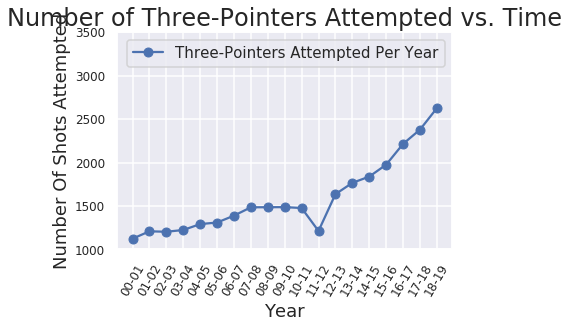

In [13]:
#gca = get current axis
ax = plt.gca()
ax.set_ylim([1000,3500])

#Change size of plot labels
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

#Set the axis labels
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number Of Shots Attempted', fontsize=18)

#Plot using MatPlotLib
league_averages.plot(kind='line',x='Year',y='3PA',ax=ax,marker = "o")

#Set the title, legend
plt.title('Number of Three-Pointers Attempted vs. Time', fontsize=24)
plt.legend(['Three-Pointers Attempted Per Year'], loc='upper right', fontsize=15)


#Set range for ticks
plt.xticks(np.arange(0,19), league_averages["Year"])
plt.xticks(rotation=60)

plt.show()

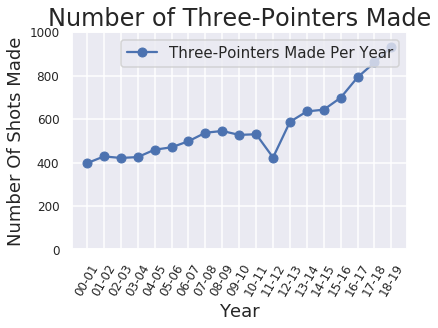

In [14]:
#gca = get current axis
ax = plt.gca()
ax.set_ylim([0,1000])

#Change size of plot labels
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

#Set the axis labels
plt.xlabel('Years', fontsize=18)
plt.ylabel('Number Of Shots Made', fontsize=18)

#Plot using MatPlotLib
league_averages.plot(kind='line',x='Year',y='3P',ax=ax,marker = "o")

#Set the title, legend
plt.title('Number of Three-Pointers Made', fontsize=24)
plt.legend(['Three-Pointers Made Per Year'], loc='upper right', fontsize=15)


#Set range for ticks
plt.xticks(np.arange(0,19), league_averages["Year"])
plt.xticks(rotation=60)

plt.show()

This is also where we find something odd. There seems to be a odd gap at years 11-12. Upon further investigation,
FACTS ABOUT STUFF
    
    
However, it seems that this didn't affect any of prior analysis, which shows that this average trend exists across
all games and not just a whole season (i.e there is no crazy three-pointer bonanza near the end of the season vs.
the start of a season).